# GradBoost Model

### Imports

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib
import seaborn as sns
import numpy as np

print(f"pandas version: {pd.__version__}")
print(f"matplotlib version: {matplotlib.__version__}")
print(f"seaborn version: {sns.__version__}")
print(f"numpy version: {np.__version__}")

import sklearn
print(f"sklearn version: {sklearn.__version__}")

import sys
print(f"Python version: {sys.version}")

pandas version: 2.2.3
matplotlib version: 3.9.2
seaborn version: 0.13.2
numpy version: 1.26.4
sklearn version: 1.1.3
Python version: 3.9.21 (main, Dec 11 2024, 10:23:52) 
[Clang 14.0.6 ]


### Import data

In [3]:
players_all = pd.read_csv('../games_by_players_all.csv', encoding='utf8')
players_ranked = pd.read_csv('../games_by_players_ranked.csv', encoding='utf8')
players_pro = pd.read_csv('../games_by_players_pro.csv', encoding='utf8')

teams_all = pd.read_csv('../games_by_team_all_added_features.csv', encoding='utf8')
teams_ranked = pd.read_csv('../games_by_team_ranked_added_features.csv', encoding='utf8')
teams_pro = pd.read_csv('../games_by_team_pro_added_features.csv', encoding='utf8')

small_file = pd.read_csv('../small_csv_file.csv', encoding='utf8')

In [4]:
players_all = players_all.drop(columns = ['game_id', 'player_tag', 'pro'])
players_ranked = players_ranked.drop(columns = ['game_id', 'player_tag', 'pro'])
players_pro = players_pro.drop(columns = ['game_id', 'player_tag', 'pro'])

small_file = small_file.drop(columns = ['game_id', 'player_tag', 'pro'])

# Team
teams_all = teams_all.drop(columns = ['pro'])
teams_ranked = teams_ranked.drop(columns = ['pro'])
teams_pro = teams_pro.drop(columns = ['pro'])

In [5]:
players_all.head()

,movement_avg_speed,movement_total_distance,movement_time_supersonic_speed,movement_time_boost_speed,movement_time_slow_speed,movement_time_ground,movement_time_low_air,movement_time_high_air,movement_time_powerslide,movement_count_powerslide,...,positioning_percent_neutral_third,positioning_percent_defensive_half,positioning_percent_offensive_half,positioning_percent_behind_ball,positioning_percent_infront_ball,positioning_percent_most_back,positioning_percent_most_forward,positioning_percent_closest_to_ball,positioning_percent_farthest_from_ball,winner
0,1468.0,505882.0,40.34,142.29,196.16,219.80,143.43,15.56,8.01,68.0,...,26.72,83.53,16.47,75.83,24.17,31.88,28.71,39.66,28.51,False
1,1410.0,474841.0,41.74,122.11,208.83,248.88,115.01,8.80,5.41,30.0,...,24.45,79.52,20.48,67.56,32.44,31.06,36.93,31.49,32.85,False
2,1355.0,465999.0,35.87,119.38,223.64,212.03,145.07,21.79,7.24,36.0,...,26.17,80.77,19.23,67.72,32.28,37.22,32.79,27.29,38.78,False
3,1455.0,500485.0,41.75,130.76,206.38,231.33,123.58,23.97,5.61,49.0,...,29.87,54.02,45.98,77.37,22.63,28.14,44.34,41.22,29.30,True
4,1518.0,521069.0,50.22,149.49,179.09,241.24,128.04,9.51,3.34,32.0,...,35.38,61.49,38.51,79.66,20.34,29.56,30.44,30.15,34.75,True


### X,y division

In [6]:
X_players_all = players_all.iloc[:, 0:44]
X_players_ranked = players_ranked.iloc[:, 0:44]
X_players_pro = players_pro.iloc[:, 0:44]

X_small_file = small_file.iloc[:, 0:44]

In [7]:
y_players_all = players_all.iloc[:, 44]
y_players_ranked = players_ranked.iloc[:, 44]
y_players_pro = players_pro.iloc[:, 44]

y_small_file = small_file.iloc[:, 44]


In [8]:
# team
X_teams_all = teams_all.iloc[:, 0:200]
X_teams_ranked = teams_ranked.iloc[:, 0:200]
X_teams_pro = teams_pro.iloc[:, 0:200]

In [9]:
# Team
y_teams_all = teams_all.iloc[:, 200]
y_teams_ranked = teams_ranked.iloc[:, 200]
y_teams_pro = teams_pro.iloc[:, 200]

### Normalisation?

In [10]:
# Z-score
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

X_players_all_normalized = scaler.fit_transform(X_players_all)
X_players_ranked_normalized =  scaler.fit_transform(X_players_ranked)
X_players_pro_normalized = scaler.fit_transform(X_players_pro)
X_small_file_normalized = scaler.fit_transform(X_small_file)

X_players_all_normalized = pd.DataFrame(X_players_all_normalized, columns=X_players_all.columns)
X_players_ranked_normalized = pd.DataFrame(X_players_ranked_normalized, columns=X_players_ranked.columns)
X_players_pro_normalized = pd.DataFrame(X_players_pro_normalized, columns=X_players_pro.columns)
X_small_file_normalized = pd.DataFrame(X_small_file_normalized, columns=X_small_file.columns)

In [11]:
# Z-score for teams
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

X_teams_all_normalized = scaler.fit_transform(X_teams_all)
X_teams_ranked_normalized =  scaler.fit_transform(X_teams_ranked)
X_teams_pro_normalized = scaler.fit_transform(X_teams_pro)

X_teams_all_normalized = pd.DataFrame(X_teams_all_normalized, columns=X_teams_all.columns)
X_teams_ranked_normalized = pd.DataFrame(X_teams_ranked_normalized, columns=X_teams_ranked.columns)
X_teams_pro_normalized = pd.DataFrame(X_teams_pro_normalized, columns=X_teams_pro.columns)

In [12]:
X_players_ranked_normalized.head()

,movement_avg_speed,movement_total_distance,movement_time_supersonic_speed,movement_time_boost_speed,movement_time_slow_speed,movement_time_ground,movement_time_low_air,movement_time_high_air,movement_time_powerslide,movement_count_powerslide,...,positioning_percent_offensive_third,positioning_percent_neutral_third,positioning_percent_defensive_half,positioning_percent_offensive_half,positioning_percent_behind_ball,positioning_percent_infront_ball,positioning_percent_most_back,positioning_percent_most_forward,positioning_percent_closest_to_ball,positioning_percent_farthest_from_ball
0,-0.244786,-0.006564,-0.105950,-0.028138,0.536498,0.210515,0.345503,0.088237,0.262826,0.215025,...,-2.540903,-1.018220,2.796536,-2.796536,0.839287,-0.839287,-0.364511,-0.855038,1.348097,-1.015858
1,-0.864632,-0.373041,-0.027812,-0.758952,0.873504,0.984698,-0.750224,-0.864637,-0.613178,-1.117797,...,-1.971989,-1.597289,2.192010,-2.192010,-0.759975,0.759975,-0.497711,0.621517,-0.427544,-0.227942
2,-1.452418,-0.477431,-0.355434,-0.857818,1.267432,0.003658,0.408733,0.966403,0.003394,-0.907351,...,-2.304965,-1.158523,2.380453,-2.380453,-0.729034,0.729034,0.502915,-0.122149,-1.340359,0.848635
3,-0.383717,-0.070282,-0.027254,-0.445694,0.808337,0.517473,-0.419809,1.273691,-0.545793,-0.451386,...,2.113161,-0.214666,-1.652232,1.652232,1.137094,-1.137094,-0.972034,1.952572,1.687142,-0.872435
4,0.289565,0.172737,0.445481,0.232608,0.082456,0.781302,-0.247855,-0.764557,-1.310612,-1.047648,...,0.370265,1.190915,-0.526095,0.526095,1.579936,-1.579936,-0.741370,-0.544279,-0.718776,0.116999


### Train-test split

In [13]:
from sklearn.model_selection import train_test_split
import sklearn
print(f"sklearn version: {sklearn.__version__}")

sklearn version: 1.1.3


In [14]:
X_train, X_test, y_train, y_test = train_test_split(X_players_pro_normalized, y_players_pro, random_state=20, test_size=0.4)

In [15]:
X_val, X_test, y_val, y_test = train_test_split(X_test, y_test, random_state=20, test_size=0.5)

## Model

In [16]:
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import GradientBoostingClassifier

In [17]:
gbr = GradientBoostingClassifier(
    n_estimators=500,
    min_samples_split=10
)

In [18]:
# next is 1 min / met parameters meer dan 17 min / now is 6 min

In [19]:
gbr.fit(X_train, y_train)

GradientBoostingClassifier(min_samples_split=10, n_estimators=500)

### metrics

In [20]:
# next is 2 min / met parameter meer dan 63 min n_jobs=1 / n_jobs=-1 zou 6 x zo snel moeten gaan dan / now is 5 min

In [21]:
cross_val_score(gbr, X_train, y_train, cv=3, n_jobs=-1).mean()

0.7611401447873242

In [22]:
y_pred = gbr.predict(X_test)

In [23]:
from sklearn.metrics import accuracy_score

In [24]:
y_pred = gbr.predict(X_test)
y_pred_classes = y_pred
y_test_classes = y_test
print("DNN Accuracy:", accuracy_score(y_test_classes, y_pred_classes))

DNN Accuracy: 0.7550276818246344


In [25]:
gbr.score(X_test, y_test)

0.7550276818246344

In [26]:
from sklearn.metrics import classification_report

In [27]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

       False       0.76      0.75      0.76     10668
        True       0.75      0.76      0.76     10465

    accuracy                           0.76     21133
   macro avg       0.76      0.76      0.76     21133
weighted avg       0.76      0.76      0.76     21133



In [28]:
from sklearn.metrics import accuracy_score, recall_score, precision_score, f1_score

In [29]:
accuracy = accuracy_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

print("accuracy", accuracy)
print("recall", recall)
print("precision", precision)
print("f1", f1)

accuracy 0.7550276818246344
recall 0.7623506927854754
precision 0.7478440194975629
f1 0.7550276818246345


### Confusion matrix

In [30]:
from sklearn.metrics import confusion_matrix

In [31]:
print(confusion_matrix(y_test, y_pred))

[[7978 2690]
 [2487 7978]]


[[7978 2690]
 [2487 7978]]
0.7550276818246344


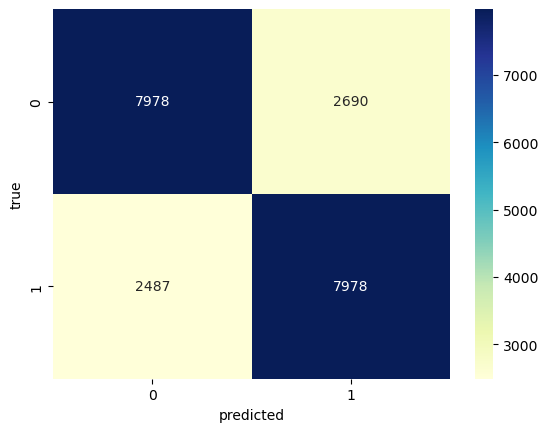

In [32]:
cm = confusion_matrix(y_test, y_pred)
accuracy = accuracy_score(y_test, y_pred)
print(cm)
print(accuracy)
labels = list(y_train.keys())

s = sns.heatmap(cm, cmap='YlGnBu', annot=True, fmt=".0f")
s.set_xlabel("predicted")
s.set_ylabel("true")
plt.show()


## ROC curve

[0.28930701 0.77660302 0.16593906 0.09840656 0.58581744 0.13869362
 0.36599131 0.93987037 0.62457047 0.49422463 0.51548308 0.81434813
 0.38938267 0.05140132 0.80094273 0.42050507 0.51961768 0.01790434
 0.9589208  0.2460773  0.05624381 0.91662179 0.96404943 0.17540158
 0.61143351 0.32080951 0.88344564 0.11383814 0.24471171 0.47535296
 0.23014861 0.07978717 0.63064748 0.36698709 0.38535391 0.39994378
 0.12036447 0.06191557 0.21089319 0.82267667 0.58728379 0.63578526
 0.68419354 0.01587586 0.50584869 0.67387965 0.37977702 0.41097065
 0.09523968 0.65430247 0.16170041 0.5967142  0.06570872 0.85609346
 0.90887662 0.88490541 0.25262312 0.49583508 0.42853139 0.42898307
 0.83719474 0.4733387  0.67982006 0.92064184 0.86113956 0.6011218
 0.2661792  0.15914186 0.39277337 0.52242528 0.11800599 0.83999929
 0.33345362 0.69366913 0.54974601 0.40540487 0.36456437 0.90317296
 0.75340319 0.28655733 0.09893112 0.09073478 0.68131806 0.16343391
 0.06938738 0.22513466 0.52599653 0.84008112 0.90095981 0.47385

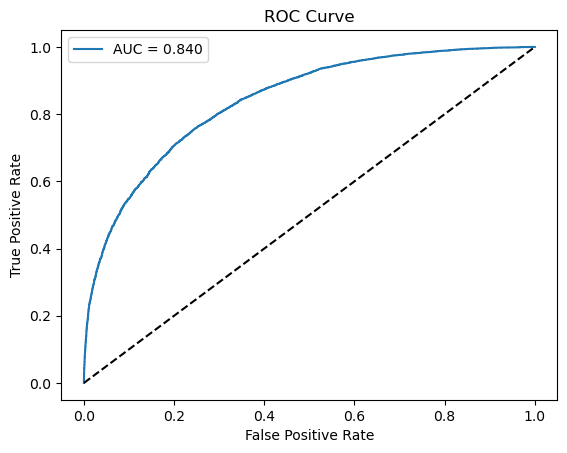

In [33]:
from sklearn.metrics import roc_auc_score, roc_curve

y_pred_proba = gbr.predict_proba(X_test)[:, 1]
print(y_pred_proba[:100]) 

roc_auc = roc_auc_score(y_test, y_pred_proba)
print(f"ROC AUC Score: {roc_auc:.3f}")

fpr, tpr, thresholds = roc_curve(y_test, y_pred_proba)

plt.plot(fpr, tpr, label=f"AUC = {roc_auc:.3f}")
plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend()
plt.show()

### features

In [34]:
features = pd.DataFrame(gbr.feature_importances_, index = X_players_ranked.columns)

In [35]:
features.sort_values(0, ascending=False)

,0
positioning_percent_infront_ball,0.278055
positioning_percent_behind_ball,0.206533
positioning_percent_most_forward,0.103667
positioning_avg_distance_to_ball_possession,0.052122
positioning_time_infront_ball,0.045682
positioning_time_most_back,0.036831
positioning_time_most_forward,0.036310
positioning_percent_offensive_third,0.031386
positioning_time_offensive_half,0.031030
positioning_percent_most_back,0.027360


# Model 2 -------------------------------------------------

In [36]:
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import GradientBoostingClassifier

In [37]:
gbr2 = GradientBoostingClassifier(
    n_estimators=500,
    min_samples_split=10,
    learning_rate= 0.1,
    max_depth=7
)

In [38]:
# next is 1 min / now depth=7 is 16 min / depth=9 21 min /9 min

In [39]:
gbr2.fit(X_train, y_train)

GradientBoostingClassifier(max_depth=7, min_samples_split=10, n_estimators=500)

### metrics

In [40]:
# next is 2 min / 11 min

In [41]:
cross_val_score(gbr2, X_train, y_train, cv=3, n_jobs=-1).mean()

0.7559663951585248

In [42]:
y_pred2 = gbr2.predict(X_test)

In [43]:
from sklearn.metrics import accuracy_score

In [44]:
y_pred2 = gbr2.predict(X_test)
y_pred_classes = y_pred2
y_test_classes = y_test
print("DNN Accuracy:", accuracy_score(y_test_classes, y_pred_classes))

DNN Accuracy: 0.7504377040647329


In [45]:
gbr2.score(X_test, y_test)

0.7504377040647329

In [46]:
from sklearn.metrics import classification_report

In [47]:
print(classification_report(y_test, y_pred2))

              precision    recall  f1-score   support

       False       0.76      0.75      0.75     10668
        True       0.74      0.76      0.75     10465

    accuracy                           0.75     21133
   macro avg       0.75      0.75      0.75     21133
weighted avg       0.75      0.75      0.75     21133



In [48]:
from sklearn.metrics import accuracy_score, recall_score, precision_score, f1_score

In [49]:
accuracy = accuracy_score(y_test, y_pred2)
recall = recall_score(y_test, y_pred2)
precision = precision_score(y_test, y_pred2)
f1 = f1_score(y_test, y_pred2)

print("accuracy", accuracy)
print("recall", recall)
print("precision", precision)
print("f1", f1)

accuracy 0.7504377040647329
recall 0.7556617295747731
precision 0.7442823529411765
f1 0.7499288762446658


### Confusion matrix

In [50]:
from sklearn.metrics import confusion_matrix

In [51]:
print(confusion_matrix(y_test, y_pred2))

[[7951 2717]
 [2557 7908]]


[[7951 2717]
 [2557 7908]]
0.7504377040647329


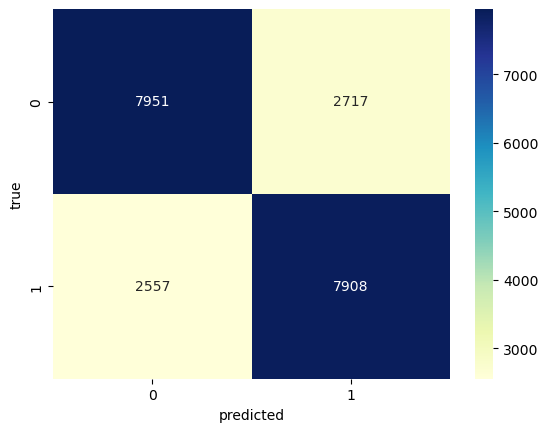

In [52]:
cm = confusion_matrix(y_test, y_pred2)
accuracy = accuracy_score(y_test, y_pred2)
print(cm)
print(accuracy)
labels = list(y_train.keys())

s = sns.heatmap(cm, cmap='YlGnBu', annot=True, fmt=".0f")
s.set_xlabel("predicted")
s.set_ylabel("true")
plt.show()


## ROC curve

[0.1459289  0.74225268 0.12639833 0.03551774 0.54098443 0.13824331
 0.3167478  0.97390232 0.41796948 0.19955751 0.64009924 0.85954052
 0.46915353 0.02193459 0.79590228 0.43072191 0.15347149 0.00686041
 0.96156832 0.1427272  0.04998726 0.94180835 0.97898261 0.06633759
 0.75941993 0.37271559 0.92022474 0.13849783 0.16493674 0.38415093
 0.12138617 0.04945443 0.54494556 0.40812027 0.49579085 0.24917351
 0.0885827  0.04505764 0.17006576 0.84712045 0.62079943 0.75379303
 0.97588166 0.00768269 0.63659461 0.78328755 0.22064529 0.25119825
 0.02896345 0.71707208 0.06854099 0.56697787 0.08118285 0.8069726
 0.92620398 0.91001725 0.2882554  0.62633415 0.57367631 0.66892134
 0.94689219 0.38645368 0.57933589 0.96221628 0.89018914 0.40121866
 0.25874229 0.06226582 0.55657036 0.6369723  0.18547282 0.9444207
 0.1781796  0.61301093 0.78756561 0.28683989 0.44313619 0.97050246
 0.79790994 0.22248818 0.17092059 0.06689679 0.7108539  0.17571862
 0.04676361 0.15716622 0.48110541 0.81873207 0.92682299 0.446341

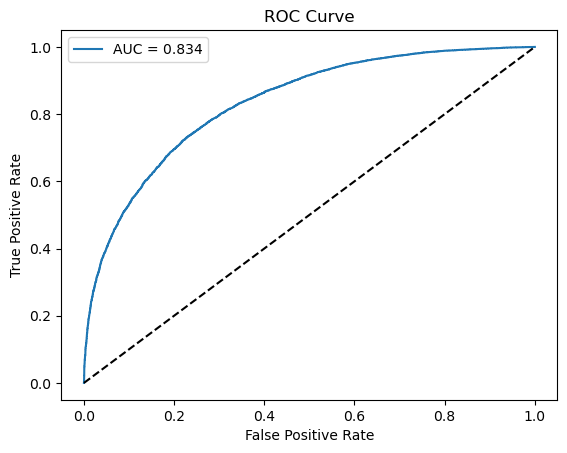

In [53]:
from sklearn.metrics import roc_auc_score, roc_curve

y_pred_proba = gbr2.predict_proba(X_test)[:, 1]
print(y_pred_proba[:100]) 

roc_auc = roc_auc_score(y_test, y_pred_proba)
print(f"ROC AUC Score: {roc_auc:.3f}")

fpr, tpr, thresholds = roc_curve(y_test, y_pred_proba)

plt.plot(fpr, tpr, label=f"AUC = {roc_auc:.3f}")
plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend()
plt.show()

### features

In [54]:
features = pd.DataFrame(gbr2.feature_importances_, index = X_players_ranked.columns)

In [55]:
features.sort_values(0, ascending=False)

,0
positioning_percent_infront_ball,0.145630
positioning_percent_behind_ball,0.144869
positioning_percent_most_forward,0.096537
positioning_avg_distance_to_ball_possession,0.053607
positioning_time_most_back,0.033326
positioning_percent_most_back,0.031197
positioning_time_infront_ball,0.029109
positioning_time_most_forward,0.027763
positioning_time_offensive_half,0.027005
positioning_percent_offensive_third,0.024469
